# II Linear algebra and calculus

## Topics

<code>**1: Tensors**</code><br>
<code>**2: Tensors and PyTorch**</code><br>
<code>**3: Vectors, Matrices and broadcasting**</code><br>
<code>**4: Notational conventions for neural networks**</code><br>
<code>**5: A fully connected(linear) layer in PyTorch**</code><br>

1:35

## Tensor

<code>**Scalar (rank-0 tensor)**</code>

\begin{multline*}
\mathbf{x} \in \mathbb{R}
\end{multline*}

<code>**Vector (column) (rank-1 tensor)**</code>

\begin{multline*}
\mathbf{x} \in \mathbb{R}^{n \times 1}
\end{multline*}

<code>**Vector (row) (rank-1 tensor)**</code>

\begin{multline*}
\mathbf{x}^{\top} \in \mathbb{R}^{1 \times n}
\end{multline*}

<code>**Matrix (rank-2 tensor)**</code>

\begin{multline*}
\mathbf{X} \in \mathbb{R}^{m \times n}
\end{multline*}

<code>**Tensor (rank-3 tensor)**</code>

\begin{multline*}
\mathbf{X} \in \mathbb{R}^{m \times n \times p}
\end{multline*}

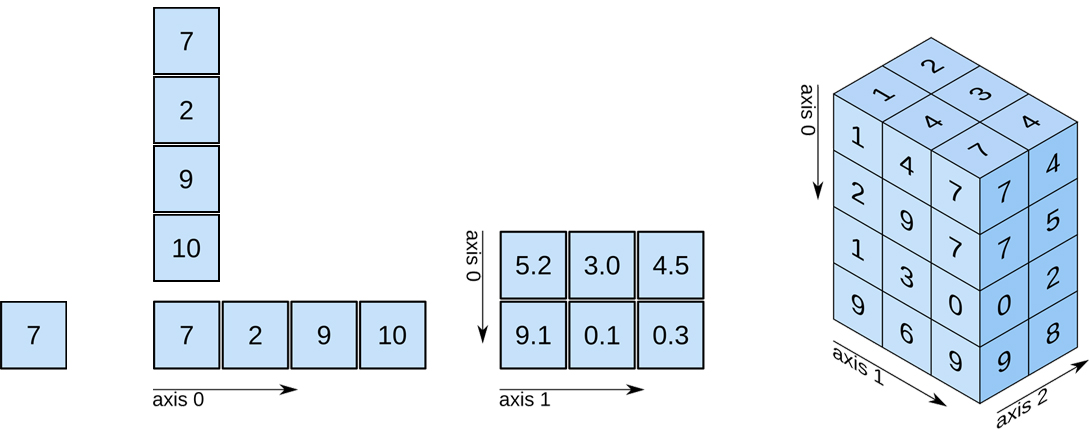

We will often use 𝐗 as a special convetion to refer to the <code>**design matrix**</code>. That is the matrix containing the training examples and features (inputs) and asusme the structure <code>**𝐗∈ℝ 𝑛×𝑚**</code> because <code>**𝑛**</code> is often used to refet to the number of examples in literature across many disciplines.

\begin{multline*}
\mathbf{X} = 
\begin{bmatrix}
x^{[1]}_{1} & x^{[1]}_{2} & \ ... \ & x^{[1]}_{m} \\
x^{[2]}_{1} & x^{[2]}_{2} & \ ... \ & x^{[2]}_{m} \\
. & . & \ ... \ & . \\
x^{[n]}_{1} & x^{[n]}_{2} & \ ... \ & x^{[n]}_{m} \\
\end{bmatrix}
\end{multline*}

<br>

<code>**2'nd feature value of the 1'st training example:**</code>

\begin{multline*}
x^{[1]}_{2}
\end{multline*}

So in our convention we will use subscript as <code>**𝑚**</code> as feature index, and as superscipt <code>**𝑛**</code> that is training example index. For example as in the iris dataset we have 150 examples and 4 features, so our <code>**n = 150, m = 4.**</code>

<code>**Tensors**</code><br>

In practice where we encouter these tensors in deep learning is when we work with image data. Think of this butterfly image as 3D tensor. We have 3 color channels (RGB). And each of these color channels consist of pixel values. So lets say that image size is 100px X 100px so each color channel matrix has 10 000 pixel values and combined with other channels, we have a 3D tensor.

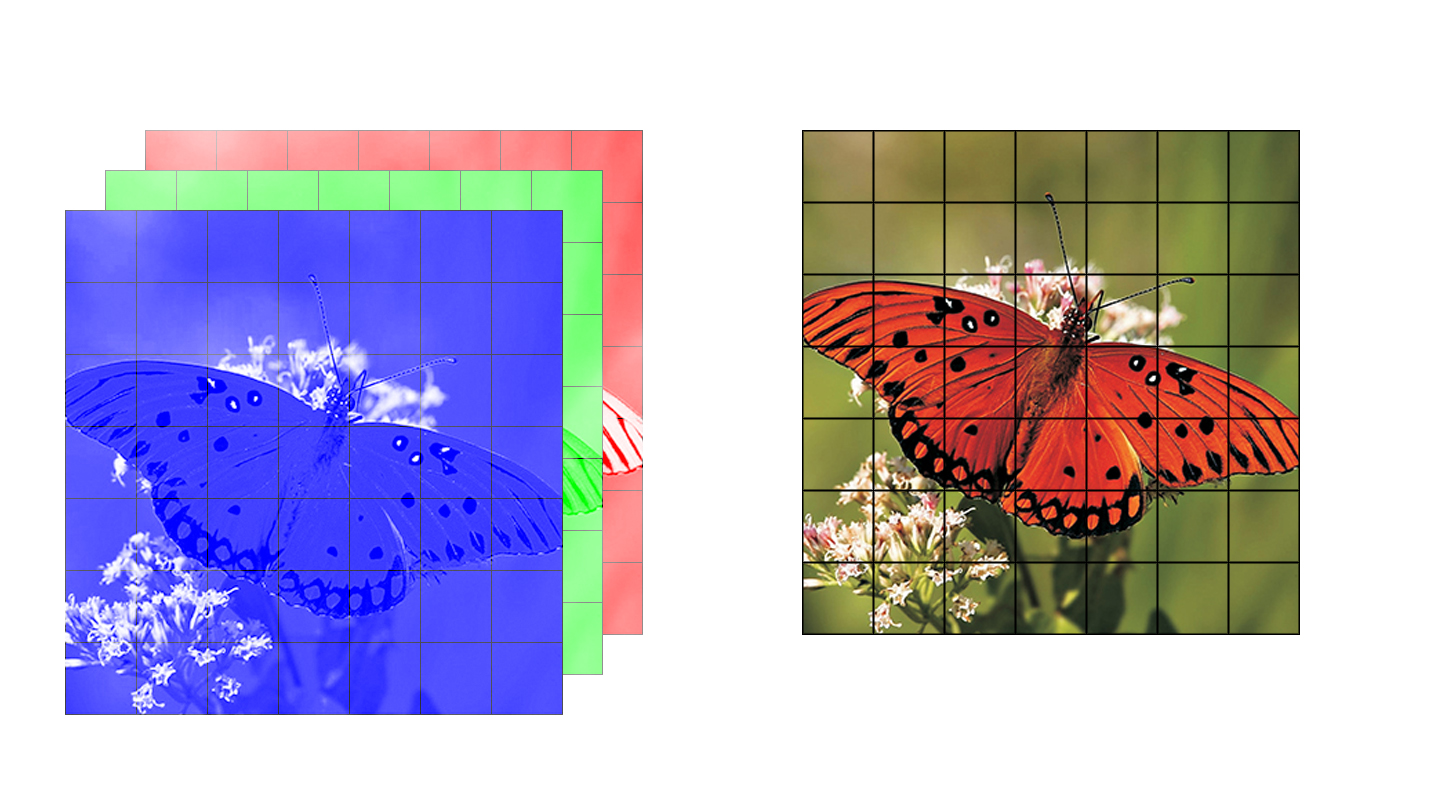

In practice in doesn't stop at 3D we work with <code>**4D tensors**</code> too. Beacause we have a training set consisting of multiple of such 3D images. 

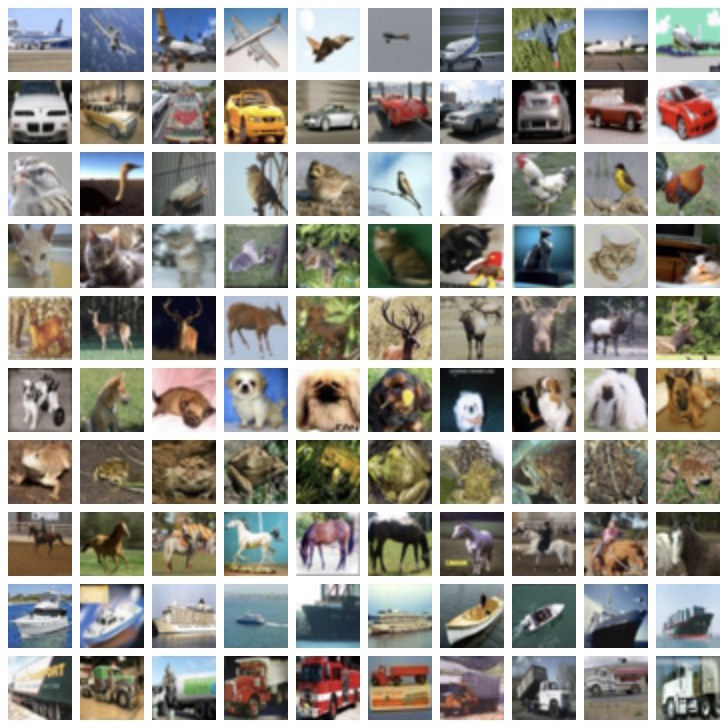

So these are a stach of multiple these 3D tensors. So each of these samples in <code>**[CIFAR dataset](https://www.cs.toronto.edu/~kriz/cifar.html)**</code>data set is a RGB 3D tensor. And regarding dimensioanlity in deep learning for these 4D tensosr we have <code>**NCHW**</code>.<br>
- <code>**N**</code> - number of training examples;
- <code>**C**</code> - color channels;
- <code>**H**</code> - height of the image;
- <code>**W**</code> - width of the image.

So basically these last <code>**CHW are our features m = C * H * W**</code> and N is our training examples. We will encouter these on convolutional neural networks lectures.

In the context of <code>**TensorFlow, Numpy, PyTorch**</code> tensors are <code>**multidimensional arrays**</code>. You can think of it as a computational data structure for representing a tensor. In mathematics we say tensor, but in practice when we do coding these are essentially multidimensional arrays. 

In [ ]:
import torch

In [ ]:
t = torch.tensor([[1,2,3],[4,5,6t]])

In [ ]:
t

\begin{multline*}
\mathbf{t} \in \mathbb{R}^{2 \times 3} 
\end{multline*}

In [ ]:
t.shape

In [ ]:
t.dtype

In [ ]:
torch.Size([2,3])

In [ ]:
t.ndim

## Working with Tensors in Pytorch

Numpy and Pytorch syntax is very similar

In [ ]:
import numpy, torch

In [ ]:
a = np.array([1.,2.,3.])
b = torch.tensor([1,2,3])

\begin{multline*}
\mathbf{a}, \mathbf{b} \in \mathbb{R}^{1 \times 3}
\end{multline*}

In [ ]:
b

In [ ]:
a

\begin{multline*}
a \cdot a
\end{multline*}

<code>**NOTE:**</code>This will work without transpose because this is 1-n array.

In [ ]:
a.dot(a)

\begin{multline*}
b \cdot b
\end{multline*}

In [ ]:
# legacy
# b.matmul(b)
# traditional
# b.dot(b)
# compact way
# b @ b

And we can convert from pytorch tensor to numpay array in case lets say to visualize it with matplotlib, <code>**but pay attention to default types.**</code>

In [ ]:
b.numpy()

### Data types

| Bits| Numpy data   | Tensor data type   ||
| :-| :- | :- |:- |
8  |numpy.uint8   | torch.ByteTensor   ||
16 |numpy.int16   | torch.ShortTensor  ||
32 |numpy.int32   | torch.IntTensor    ||
64 |numpy.int     | torch.LongTensor   ||
64 |numpy.int64   | torch.LongTensor   |default int in Numpy and PyTorch |
16 |numpy.float16 | torch.HalfTensor   ||
32 |numpy.float32 | torch.FloatTensor  |default float in Pytorch |
64 |numpy.float   | torch.DoubleTensor ||
64 |numpy.float64 | torch.DoubleTensor | default float in Numpy |

- int32 stand for 32bit integer
- 32 bit float are less precise than 64 floats, but for neural nets it doesn't matter much
- For regulars GPU's we ussually want 32 bit floats (vs 64 bit floats) for fast perfromance. In DL 32 bit is sufficient. And GPU a think doesn't support 64 bit (that has to be checked). Only Google TPU use 64 bit (that has to be checked).

<code>**Specify the type upon construction**</code> when we call `torch.tensor` we can provide the details about type.  

In [ ]:
c = torch.tensor([1., 2., 3.], dtype=torch.float)

In [ ]:
c.dtype

In [ ]:
c = torch.tensor([1.,2.,3.], dtype=torch.double)

In [ ]:
c.dtype

In [ ]:
c = torch.tensor([1.,2.,3.], dtype=torch.float64)

In [ ]:
c.dtype

You can also change types later on the fly if you must

In [ ]:
d = torch.tesnor([1,2,3])
d.dtype

It will be changed from `int64` to `float64`

In [ ]:
e = d.double()
e.dtype

In [ ]:
f = d.float64()
f.dtype

In [ ]:
g = d.to(torch.float64)
g.dtype

If PyToch is so similar to NumPy why don't we just use NumPy in the first place ? The reason is that PyTorch has <code>**GPU support**</code>:
 - A. We can load the dataset and model parameters to GPU memory;
 - B. On the GPU we then have <code>**better parallelism (many cores)**</code> for computing (many and big) matrix multiplications.
 
Also PyTorch has automatic differention and it implements many deep learning convenience functions that we will go through later in the course (convoliutional, fully connected layers, etc.)

About CPU and GPU performance difference without many details just image that what it would take to do on GPU for few hours it would take days or weeks on a regular PC CPU.

### Loading data onto the GPU is simple

If your PyTorch version supports GPU (if you have a GPU on your computer), you can find that by calling `torch.cuda.is_available` method. Cuda is a C++ library for NVIDIA GPU's. 

In [ ]:
print(torch.cuda.is_available())

In [ ]:
b = b.to(torch.device('cuda:0'))

In [ ]:
print(b)

In [ ]:
b = b.to(torch.device('cpu'))

In [ ]:
print(b)

### How to check your CUDA devices

 - If you have CUDA installed you should have access in terminal to `nvidia-smi` utility tool.
 - However if your using a laptop, you probably don't have CUDA compatible graphics card unless it is a gaming computer.
 - We will go through GPU cloud computing later in the upcomming topics 
 
 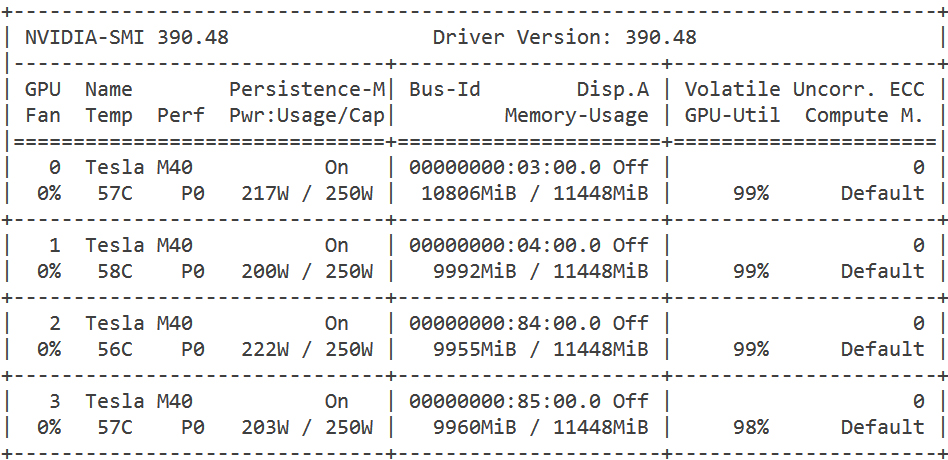

## Broadcasting semantics

<code>**Making vector and matrix computations more convenient on computer**</code>

### vectors

\begin{multline*}
\mathbf{w}^{\top} \mathbf{x} + b = z
\end{multline*}

where

\begin{multline*}
\mathbf{x} =
\begin{bmatrix}
x_1 \\
x_2 \\
. \\
x_m
\end{bmatrix},
\mathbf{w} =
\begin{bmatrix}
w_1 \\
w_2 \\
. \\
w_m
\end{bmatrix}
\end{multline*}

<div class="alert alert-block alert-success">
<h2>Quiz</h2>
    
How do we call <code>**b**</code> in the contect of neural nets ?
</div>

<code>**Basic vector operations:**</code>
 - Addition and subtraction
 - Inner product (e.g dot product)
 - Scalar multliplication

In PyTorch tensors are not <code>**real tensors !**</code>. Not valid linear algebra operations in traditional sense.

In [ ]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
c = torch.tensor([7, 8, 9])

Multiplying these vectors in traditional algebra would be not valid.

In [ ]:
a * b

Adding scalar value to the vector like that is not valid in linear algebra. We would had to create a vector of 1's like <code>**d = torch.tensor([1, 1, 1])**</code> and add it. But here you don't need to create this explictly , PyTorch will do it implictly and thats nice. This is also related to the concept of broadcasting.

In [ ]:
c + 1

While not equivalent to the mathematical definitons but very useful for computating. These "extensions" are now also commonly used in mathematical notation in computer science literature as 
they are quite convenient. But be carefull you might compute something that you don't inted to but it many cases it makes life easier.

### matrices

Some concepts are different from the linear algebra in traditional sense and linear algebra on the computer. If you would think about the perceptron algoritm , this is typically consider an <code>**"online" algoritm, meaning it updates the weights after each training example**</code>. However during prediction when model is trained (e.g test set evaluation) we could pass all data point at once so that we can get rid of the for-loop. We can feed it a large matrix of n training examples and then do all the computations at once. This will make it more efficient because now we can do matrix multiplication inside perceptron instead of processing each feature vector. 

\begin{multline*}
\mathbf{X} = 
\begin{bmatrix}
x^{[1]}_{1} & x^{[1]}_{2} & \ ... \ & x^{[1]}_{m} \\
x^{[2]}_{1} & x^{[2]}_{2} & \ ... \ & x^{[2]}_{m} \\
. & . & \ ... \ & . \\
x^{[n]}_{1} & x^{[n]}_{2} & \ ... \ & x^{[n]}_{m} \\
\end{bmatrix}
\end{multline*}
<br>

So instead of providing the first feature vector doing the computation the net input then doing the second one and so forth now we can give it this large matrix so we can avoid having a for loop for prediction. Computer essentially can leverage lower level routines to compute certain things in parallel.
<br>

<code>**Opportunities for parallelism:**</code>
  1. multiplying elements to compute the dot product
  2. computing multiple dot products

### Computing the output from multiple test examples at once

Now instead of feature vector we have this design matrix and w which is: 

\begin{multline*}
\mathbf{X} \in \mathbb{R}^{n \times m}
\end{multline*}


\begin{multline*}
\mathbf{w} \in \mathbb{R}^{m}
\end{multline*}

This is why 𝐰 is not a vector but an 𝑚×1 matrix

\begin{multline*}
\mathbf{X}\mathbf{w} + b = \mathbf{z}
\end{multline*}

So the product of multiplying 𝐗 and 𝐰 would be ℝ𝑛×1. Thats why we have this extra dimensions for the vectors because we can not in linear algebra in a traditional sense compute/multliply do matrix and vector multplication we can only do a <code>**dot product**</code> between two vectors and <code>**matrix multiplication**</code> between two matrices.

where

\begin{multline*}
\mathbf{X} = 
\begin{bmatrix}
x^{[1]}_{1} & x^{[1]}_{2} & \ ... \ & x^{[1]}_{m} \\
x^{[2]}_{1} & x^{[2]}_{2} & \ ... \ & x^{[2]}_{m} \\
. & . & \ ... \ & . \\
x^{[n]}_{1} & x^{[n]}_{2} & \ ... \ & x^{[n]}_{m} \\
\end{bmatrix},
\mathbf{w}=
\begin{bmatrix}
w_{1} \\
w_{2} \\
.     \\
w_{m}
\end{bmatrix}
\end{multline*}

\begin{multline*}
\mathbf{z}=
\begin{bmatrix}
\mathbf{w}^{\top}\mathbf{x}^{[1]} +b \\
\mathbf{w}^{\top}\mathbf{x}^{[2]} +b \\
. \\
\mathbf{w}^{\top}\mathbf{x}^{[n]} +b 
\end{bmatrix}
=
\begin{bmatrix}
z^{[1]} \\
z^{[2]} \\
. \\
z^{[n]} 
\end{bmatrix}
\end{multline*}

Both NumPy and PyTorch is not very picky about traditional linear algebra notation.

In [ ]:
import torch

`view(2,3)` creates a 2 by 3 matrix with 6 elements from 0 to 5.

In [ ]:
X = torch.arange(6).view(2,3)

In [ ]:
X

Here we can ommit second dimension

\begin{multline*}
\mathbf{w} \in \mathbb{R}^{m \ \times \ \ \hspace-2.2ex\diagup 1 }
\end{multline*}

In [ ]:
w = torch.tensor([1, 2, 3])

so 𝐰 is 1 dimensional vector and we can multiply 𝐗 with 𝐰

In [ ]:
X.matmul(w)

And it will give us a vector with values [8, 26]. So this is also a vector with 1 dimension and two elements. But we can add another dimension to this vector with `view(-1,1)` function thats the same as NumPy `reshape`.

In [ ]:
w = w.view(-1, 1)

now 𝐰 is a <code>**column vector**</code> with two dimensions so it is a matrix.

\begin{multline*}
\mathbf{w}=
\begin{bmatrix}
1 \\
2 \\
3
\end{bmatrix}
\in \mathbb{R}^{m \times 1}
\end{multline*}

<code>**NOTE:**</code> this operation is not necessary. But we can see that output is a 𝑛×1 dimensional where prevous output was only 𝑛 elements (1 axis)

In [ ]:
X.matmul(w)

By the the term is not valid as well in traditional linear algebra, we can't add a scalar value to a vector

\begin{multline*}
\mathbf{X}\mathbf{w} + b = \mathbf{z}
\end{multline*}

In traditional linear algebra this should be like


\begin{multline*}
\mathbf{X}\mathbf{w} + 1_{m}b = \mathbf{z}
\end{multline*}

But machine learning enginerrs are just plainly lazy folk and we don't that because that would be to much effort.

### Broadcasting

In PyTorch it works just fine. This (general) feature is called <code>**broadcasting**</code>

In [ ]:
torch.tensor([1, 2, 3]) + 1

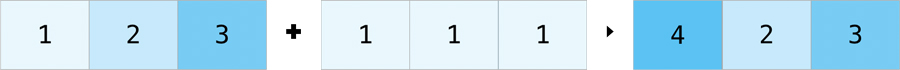

In [ ]:
t = torch.tensor([[4, 5, 6],[7, 8, 9]])

In [ ]:
t + torch.tensor([1, 2, 3])

Implicit dimensions get added, elements are imlictly duplicated

## Notational linear agelbra conventions in deep learning

\begin{multline*}
\mathbf{x}^{\top}\mathbf{w} + b = z
\end{multline*}

Perceptron with one test set example as input during inference (inference means predicting the target variable)

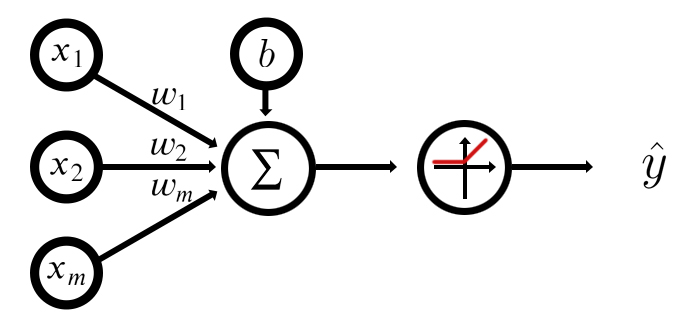


If we want to do this for multiple data points so that means we have <code>**𝑛**</code> testing  examples we can use design matrix

\begin{multline*}
\mathbf{X} \in \mathbb{R}^{n \times m}, z \in \mathbb{R}^{n \times 1}
\end{multline*}

\begin{multline*}
\mathbf{X}\mathbf{w} + b = \mathbf{z}
\end{multline*}

In deep learning we usually have these NN with hidden layers representations. We have one data point as our input feature vector 𝐱 further we a number of outputs and 𝐡  is the number of <code>**hidden units and a hidden layer**</code>. And we can have multiple hidden layers. In perceptron we had a single output but here we can have multiple outputs. So how should we deal with linear albebra having this case

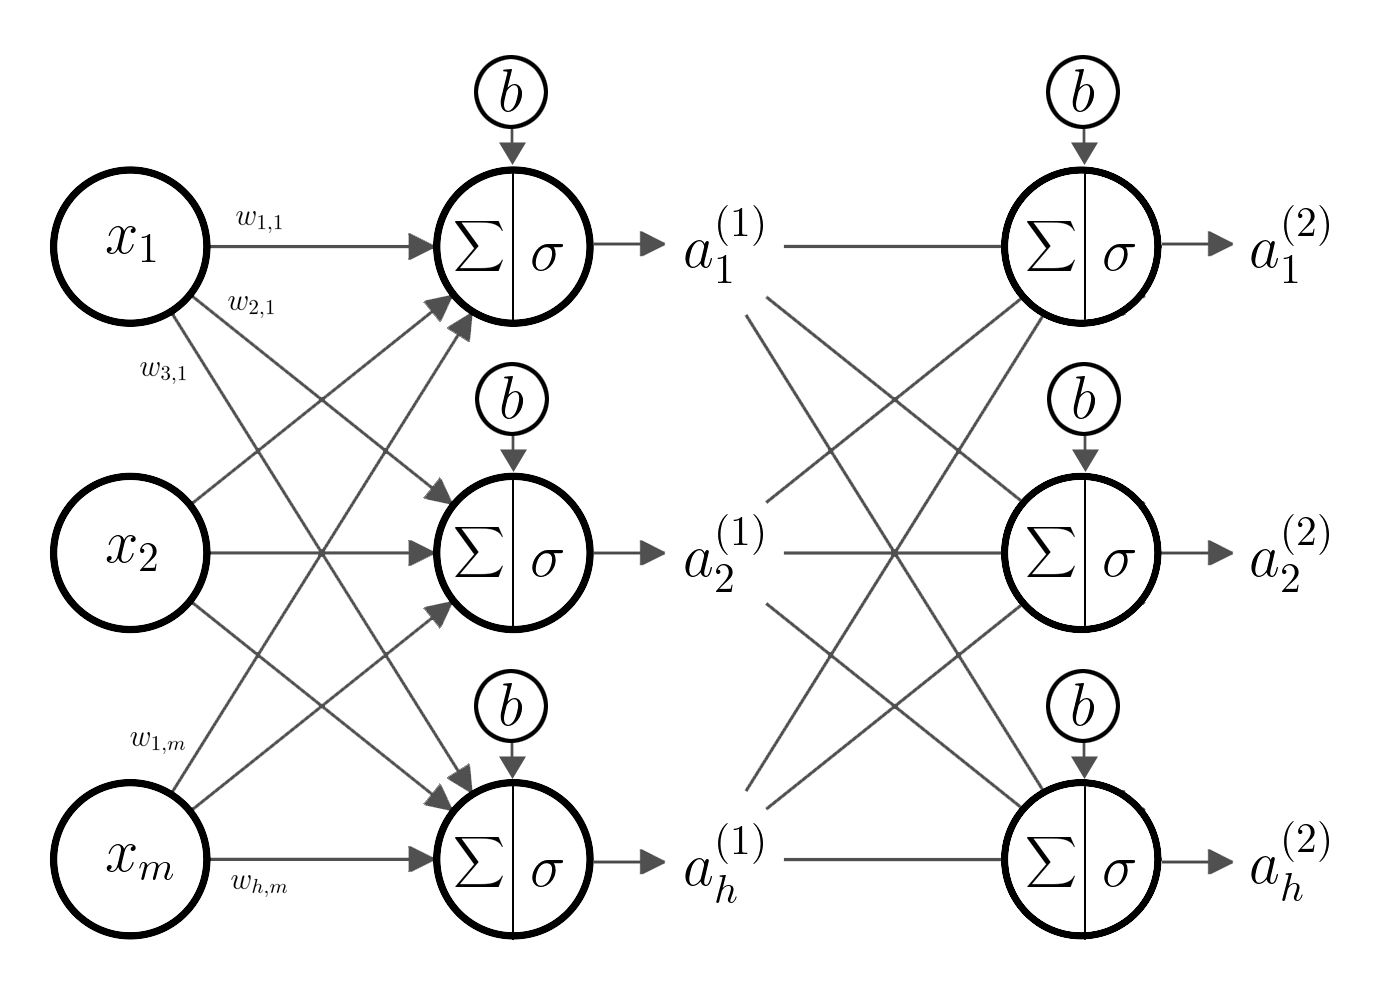

So now we have weight matrix. Before we talked about design matrix 𝐗 for inputs now in this NN case there is 1 input feature vector 𝐱, but multiple outputs. 

\begin{multline*}
\mathbf{W} \in \mathbb{R}^{h \times m}
\end{multline*}

\begin{multline*}
w_{i,j}
\end{multline*}

\begin{multline*}
\mathbf{W} = 
\begin{bmatrix}
w_{1,1} & w_{1,2} & \ ... \ & w_{1,m} \\
w_{2,1} & w_{2,2} & \ ... \ & w_{2,m} \\
. & . & \ ... \ & . \\
w_{h,1} & w_{h,2} & \ ... \ & w_{h,m} \\
\end{bmatrix},
\mathbf{x}=
\begin{bmatrix}
x_{1} \\
x_{2} \\
.     \\
x_{m}
\end{bmatrix}
\end{multline*}

<code>**NOTE: 𝑤_𝑖,𝑗 refers to the weight connecting the 𝑗-th input to 𝑖-th output**</code>

<code>**Layer activations for 1 training example**</code>

\begin{multline*}
\sigma(\mathbf{W}\mathbf{x} + \mathbf{b}) = \mathbf{a}
\end{multline*}

\begin{multline*}
\mathbf{W} \in \mathbb{R}^{h \times m}
\end{multline*}

\begin{multline*}
\mathbf{x} \in \mathbb{R}^{m \times 1}
\end{multline*}

\begin{multline*}
\mathbf{b} \in \mathbb{R}^{h \times 1}
\end{multline*}

\begin{multline*}
a \in \mathbb{R}^{h \times 1}
\end{multline*}

## Fully connected (linear) layer in PyTorch

Layer activations for 𝑛 training examples

\begin{multline*}
\mathbf{W} \in \mathbb{R}^{h \times m}
\end{multline*}

\begin{multline*}
\mathbf{X} \in \mathbb{R}^{n \times m}
\end{multline*}

Inner dimmnesions don't mach thats why we do a transpose <code>**⊤**</code>

\begin{multline*}
\sigma([\mathbf{W}\mathbf{X}^{\top} + \mathbf{b}]^{\top}) = \mathbf{A}
\end{multline*}

\begin{multline*}
\mathbf{b} \in \mathbb{R}^{h \times 1}
\end{multline*}

____________
<code>**NOTE**</code><br>
Machine learning old textbooks usually represent training examples over columns and featurs over rows (instead of using the desing matrix), - in that case we could drop the transpose ⊤
______________

However it is usually nice for each layer to remble the input dimensions of the previous layer. So the original input was :

\begin{multline*}
\mathbf{X} \in \mathbb{R}^{n \times m}
\end{multline*}

So it would be nice if we have for this one as input to the next layer the same dimensionality, the same ordering. I mean not exatly the same dimensionality but the input the first dimension, the number of inputs <code>**𝑛**</code>should be the same, we are carrying over the same number of training examples. So what we would want is for the outputs to <code>**𝑎**</code> to have dimensioanlity:

\begin{multline*}
\mathbf{A} \in \mathbb{R}^{n \times h}
\end{multline*}

In order to achieve that we have this final transpose 

\begin{multline*}
\sigma([\mathbf{W}\mathbf{X}^{\top} + \mathbf{b}]^{\top}) = \mathbf{A}
\end{multline*}

It is ussualy nice to have <code>**training examples as the rows always**</code>. Now if we think of this whats going on here it is a<code>**linear transformation**</code> that is happening to 𝐱. So instead of the original <code>**𝑚 features**</code> we now have <code>**ℎ features**</code>. And ℎ can be smaller or larger than 𝑚. In deep learning there are both some networks make it smaller some make it larger. It is a linear transformation but it is not necessary and completely true. If <code>**𝜎 is non linear function**</code> then it is a linear transformation that goes through nonlinear activation function.

### Why is the 𝐖𝐱 notation intuitive

\begin{multline*}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
=
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
\end{multline*}

## A fully connected linear layer in PyTorch

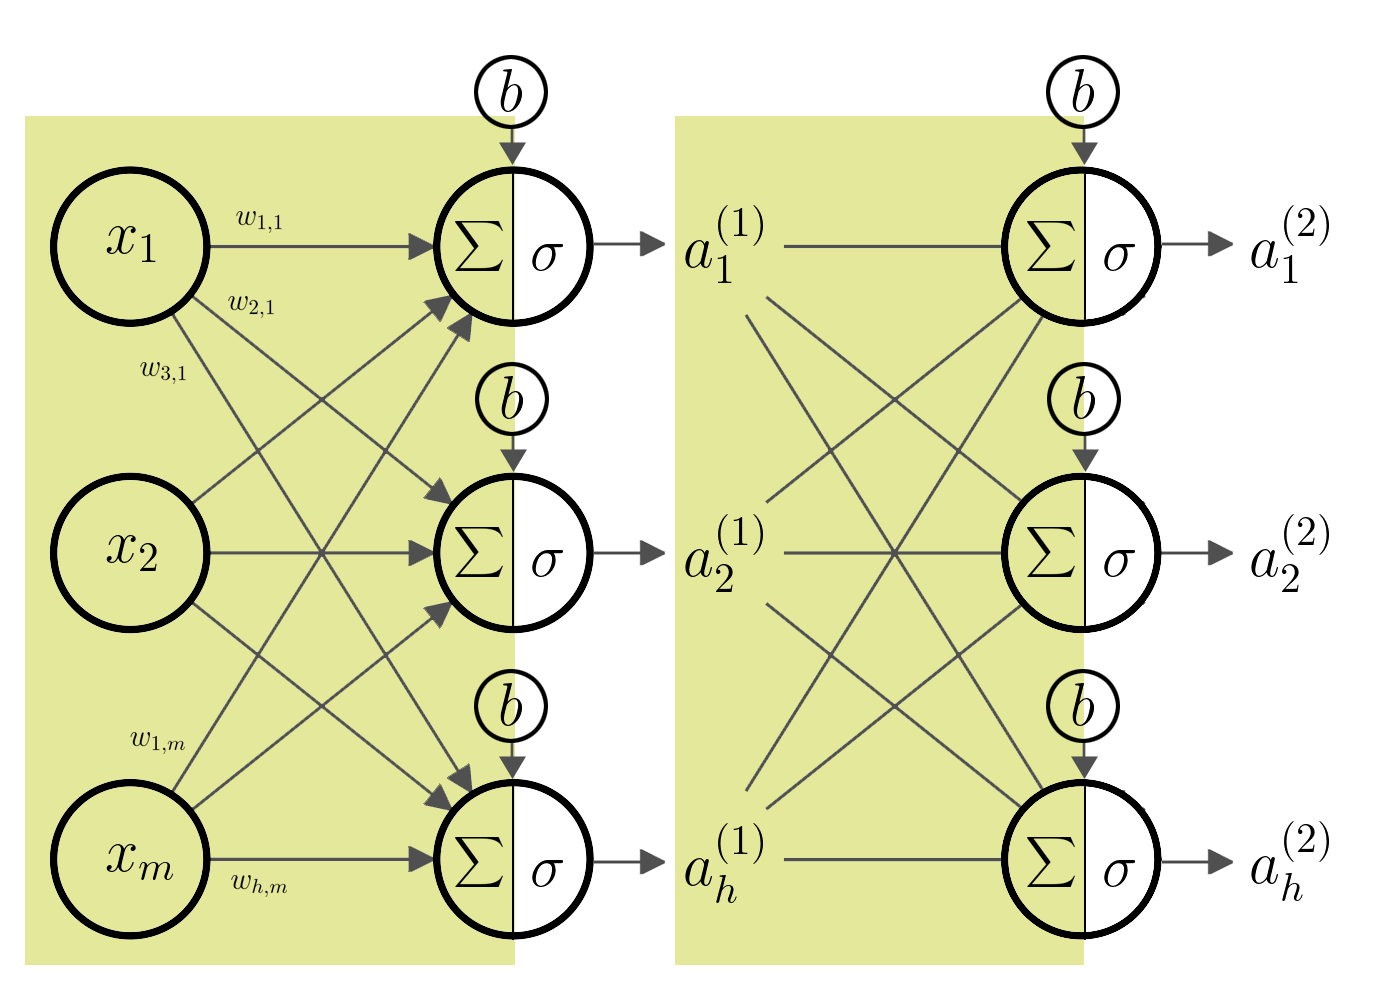

If we have multilayer newtwork , inputs connecting net input sum functions wihthout activations would be a linear transformations. An we can think about this as a <code>**fully connected layer**</code>. Sometimes people call it a <code>**dense layer**</code> in Keras and TensorFlow. In PyTorch it is called a linear later because it is a linear transformation. All these mean the same thing. Neural network is a concatenation of multile of these fully connected layers. Which are then interspersed with these nonlinear activation functions <code>**𝜎**</code>. So we can do this many times.

In [ ]:
import torch

In [ ]:
X = torch.arange(50, dtype=torch.float).view(10, 5)
X

\begin{multline*}
\mathbf{X} \in \mathbb{R}^{10 \times 5}
\end{multline*}

In [ ]:
fc_layer = torch.nn.Linear(in_features=5, out_features=3)

In [ ]:
fc_layer.weight

\begin{multline*}
\mathbf{W} \in \mathbb{R}^{3 \times 5}
\end{multline*}

In [ ]:
fc_layer.bias

\begin{multline*}
\mathbf{b} \in \mathbb{R}^{3}
\end{multline*}

In [ ]:
print('X dim: ', X.size())
print('W dim: ', fc_layer.weight.size())
print('b dim:' , fc_layer.bias.size())

Applying this fully connected layer to this 𝐗

In [ ]:
a = fc_layer(X)
print('a: ', a)
print('A dim: ', A.size())

\begin{multline*}
\mathbf{X} \in \mathbb{R}^{10 \times 5} \cdot \mathbf{W} \in \mathbb{R}^{3 \times 5} + \mathbf{b} \in \mathbb{R}^{3} \Rightarrow \mathbf{a} \in \mathbb{R}^{10 \times 3}
\end{multline*}

For convenience reasons 𝐖 and 𝐗 are swapped in places. Primary reason is that in case we 𝐗 or 𝐱 we can still apply this formulation

\begin{multline*}
\sigma(\mathbf{X}\mathbf{W}^{\top} + \mathbf{b}) = \mathbf{a}
\end{multline*}

 - Always think about hw the dot product are computed when <code>**writing and implementing matrix multiplication**</code>
 - Theoretical intuition and convention does not always match up with practical convenience (coding
 - When switching between theory and code these rules may be useful:
 
\begin{multline*}
\mathbf{A}\mathbf{B} = (\mathbf{B}^{\top} \mathbf{A}^{\top})^{\top}
\end{multline*}   
    
\begin{multline*}
(\mathbf{A}\mathbf{B})^{\top} = \mathbf{B}^{\top} \mathbf{A}^{\top}
\end{multline*}  

### Summary

Transformation matrix should ideally be always in the fron

\begin{multline*}
\mathbf{W} = 
\begin{bmatrix}
w_{1,1} & w_{1,2} & \ ... \ & w_{1,m} \\
w_{2,1} & w_{2,2} & \ ... \ & w_{2,m} \\
. & . & \ ... \ & . \\
w_{h,1} & w_{h,2} & \ ... \ & w_{h,m} \\
\end{bmatrix}
\end{multline*}

\begin{multline*}
w_{i,j}
\end{multline*}

\begin{multline*}
\sigma(\mathbf{W}\mathbf{x} + \mathbf{b}) = \mathbf{a}, \ \mathbf{a} \in \mathbb{R}^{h \times 1} \  \mathbf{x} \in \mathbb{R}^{m \times 1}
\end{multline*}

\begin{multline*}
\Leftrightarrow  \ \sigma([\mathbf{x}^{\top}\mathbf{W}^{\top}]^{\top} + \mathbf{b}) = \mathbf{a} \ \  \ \ \mathbf{x} \in \mathbb{R}^{m \times 1}
\end{multline*}

\begin{multline*}
\Leftrightarrow \ \sigma([\mathbf{x}\mathbf{W}^{\top}] + \mathbf{b}) = \mathbf{a} \  \ \ \ \ \ \ \ \mathbf{x} \in \mathbb{R}^{1 \times m}
\end{multline*}

\begin{multline*}
\sigma([\mathbf{W}\mathbf{X}^{\top}]^{\top} + \mathbf{b}) = \mathbf{A}  \  \ \ \ \ \ \mathbf{X} \in \mathbb{R}^{n \times m}
\end{multline*}

\begin{multline*}
\Leftrightarrow \sigma([\mathbf{X}\mathbf{W}^{\top}] + \mathbf{b}) = \mathbf{A} \ \  \ \mathbf{X} \in \mathbb{R}^{n \times m}
\end{multline*}

\begin{multline*}
\mathbf{A} \in \mathbb{R}^{n \times h} 
\end{multline*}

<div class="alert alert-block alert-success">
<h2>Home work assignment</h2>

1. Wihtout running the code can you tell if the perceptron could predict the class labels if we feed an array of multiple training examples at once (i.e., via its <code>**forward**</code> method) ?
    - If yes then why ?
    - If no what change would you need to make
       
2. Run the code to verify your intuition.
3. What about the train method ? Can we have parallelism through matrix multiplication without affecting the perceptron learning rule ?


<code>**Revisit our perceptron code:**</code>

%load ../code_examples/perceptron_impl.py